<a href="https://colab.research.google.com/github/Erre-vicu/PEA-DS-DMC/blob/main/Trabajo_Final_Robinson_Rios_Statistics_w_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PEA Data Science - Trabajo Final
Robinson Raúl Ríos Vicuña

In [ ]:
#Importamos las librerias necesarias
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("datos_morosidad.csv")
df.head()

,periodo,cuenta,cta_pagada,automatico,impv,cuotas,ncvig,dia_venc,cesados,target
0,201801,70544044,1484.79,0,71021.68,72,71,18,NO,0
1,201801,70544071,379.41,0,0.00,18,3,17,NO,0
2,201801,70558147,1049.96,0,43125.64,72,57,17,NO,0
3,201801,70602661,526.53,0,12538.01,36,29,17,NO,0
4,201801,70613164,188.78,0,7753.83,72,57,17,NO,0


# Entendimiento del Problema
### El conjunto de datos morosidad contiene informacion el cual registra los atributos de los clientes que pueden o no caer en mora.
 

# Entendimiento de los Datos

In [ ]:
df.isnull().sum() #La data no cuenta con valores nulos

periodo       0
cuenta        0
cta_pagada    0
automatico    0
impv          0
cuotas        0
ncvig         0
dia_venc      0
cesados       0
target        0
dtype: int64

In [ ]:
#Convertimos las variables correspondientes a str
df["target"]=df["target"].astype("str")
df["automatico"]=df["automatico"].astype("str")

In [ ]:
#Cantidad de clientes morosos
#¿Cuál es el porcentaje de morosidad general?
stay=df[df.target=="0"].shape[0]
left=df[df.target=="1"].shape[0]

#El porcentaje de morosos es el siguiente:
print(round((stay/df.shape[0])*100),"% Es la cantidad de clientes no morosos")
print(round((left/df.shape[0])*100),"% Es la cantidad de clientes morosos")

96 % Es la cantidad de clientes no morosos
4 % Es la cantidad de clientes morosos


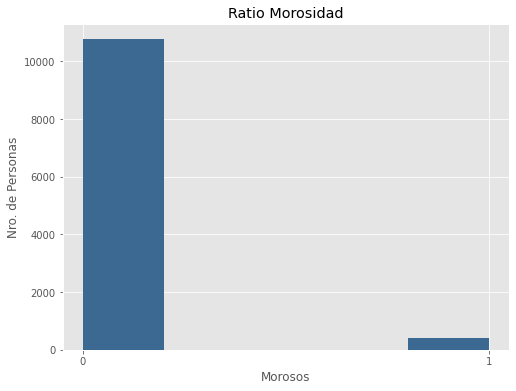

In [ ]:
fig, ax=plt.subplots(figsize=(8,6))
ax.hist(df.target, bins=5, color="#3b6991")
ax.set_xlabel("Morosos")
ax.set_ylabel("Nro. de Personas")
ax.set_title("Ratio Morosidad")
plt.show()

In [ ]:
df_1=df[df["target"]=="1"] #data morosa
df_0=df[df["target"]=="0"] #data no morosa
{"Pob Total":df.shape[0],"Pob. morosa": df_1.shape[0], "Pob. No morosa": df_0.shape[0]}

{'Pob Total': 11194, 'Pob. morosa': 421, 'Pob. No morosa': 10773}

In [ ]:
morosos=pd.DataFrame(df.groupby(["periodo","target"])["cuenta"].count())
morosos=morosos.reset_index()
print("Cantidad de Clientes Morosos por Periodo")
morosos[morosos["target"]=="1"]

Cantidad de Clientes Morosos por Periodo


,periodo,target,cuenta
1,201801,1,138
3,201802,1,143
5,201803,1,140


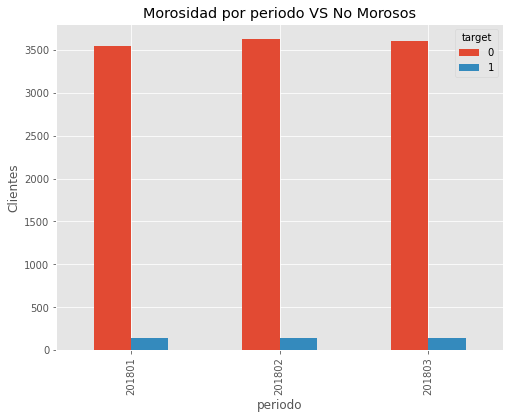

In [ ]:
periodo = pd.crosstab(df['target'],df['periodo'])
periodo=periodo.T
periodo.plot(kind="bar", figsize=(8,6))
plt.title("Morosidad por periodo VS No Morosos")
plt.ylabel("Clientes")
plt.show()

In [ ]:
moroso3=pd.DataFrame(df_1["cuenta"].value_counts())
moroso3=moroso3[moroso3["cuenta"]==3]
moroso3=moroso3.reset_index().rename(columns={"index":"cuenta", "cuenta":"cantidad"})
print("Existen", moroso3.shape[0], "cuentas que mantienen deuda constante estos 3 periodos")

Existen 96 cuentas que mantienen deuda constante estos 3 periodos


In [ ]:
print("Contamos con una población de ",df["cuenta"].nunique(),"cuentas en general")

Contamos con una población de  4287 cuentas en general


In [ ]:
print("La Variable Cesados no llega a ser significativa ya que solo cuenta con 4 cuentas cesadas")
pd.DataFrame(df.groupby(["cesados"])["cuenta"].count())

La Variable Cesados no llega a ser significativa ya que solo cuenta con 4 cuentas cesadas


,cuenta
cesados,
NO,11190
SI,4


In [ ]:
print("La Variable Automatico no llega a ser significativa ya que solo cuenta con 156 cuentas con pagos automaticos")
pd.DataFrame(df.groupby(["automatico"])["cuenta"].count())

La Variable Automatico no llega a ser significativa ya que solo cuenta con 156 cuentas con pagos automaticos


,cuenta
automatico,
0,11038
1,156


In [ ]:
#Creamos una nueva variable para poder separar y diferenciar las cuotas con un label aplicando apply lambda
df["cuotas_label"]=df["cuotas"].apply(lambda x: "6 años" if x== 72 else("5 años" if x== 60 else("4 años" if x == 48 else ("3 años" if x == 36 else("2 años" if x == 24 else ("1 año" if x == 12 else ("8 años" if x== 96 else("7 años" if x==84 else "otros"))))))))

In [ ]:
df["cuotas_label"].value_counts()

6 años    7256
5 años    1040
4 años     882
otros      690
3 años     627
2 años     392
1 año      162
7 años     105
8 años      40
Name: cuotas_label, dtype: int64

In [ ]:
df.head()

,periodo,cuenta,cta_pagada,automatico,impv,cuotas,ncvig,dia_venc,cesados,target,cuotas_label
0,201801,70544044,1484.79,0,71021.68,72,71,18,NO,0,6 años
1,201801,70544071,379.41,0,0.00,18,3,17,NO,0,otros
2,201801,70558147,1049.96,0,43125.64,72,57,17,NO,0,6 años
3,201801,70602661,526.53,0,12538.01,36,29,17,NO,0,3 años
4,201801,70613164,188.78,0,7753.83,72,57,17,NO,0,6 años


Los préstamos de 6 años son aquellos que tienen el mayor número de morosidad


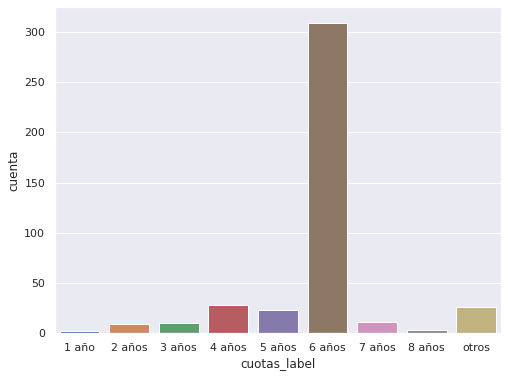

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (8, 6))
cuota_label=pd.DataFrame(df.groupby(["cuotas_label","target"])["cuenta"].count())
cuota_label=cuota_label.reset_index()
print("Los préstamos de 6 años son aquellos que tienen el mayor número de morosidad")
label_1=cuota_label[cuota_label["target"]=="1"]
sns.barplot(data=label_1, x=label_1["cuotas_label"], y=label_1["cuenta"])